<a href="https://colab.research.google.com/github/francoishcm/BackTesting/blob/master/Zipline_Reloaded_BacktestEngine_5_18042022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧰# **INSTALL PACKAGES**

In [ ]:
!pip install pytz

In [ ]:
# Mount Google Drive 
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Install ta-lib v0.4.0
%%bash
wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
tar -xzf ta-lib-0.4.0-src.tar.gz
cd ta-lib/
./configure
make
make install

In [ ]:
# Install zipline
%pip install zipline-reloaded

In [ ]:
# Install Pyfolio
!pip install pyfolio-reloaded

In [ ]:
# Install matplot library
!pip install matplotlib

In [ ]:
# Install data bundle 'Quandl'
!pip install quandl

In [12]:
# Ingest Quandl using API key
!QUANDL_API_KEY=KUnssHvVERHb5XYu9C1- zipline ingest -b 'quandl'

[2022-04-25 20:56:28.369287] INFO: zipline.data.bundles.core: Ingesting quandl.
[2022-04-25 20:56:28.369495] INFO: zipline.data.bundles.quandl: Downloading WIKI metadata.
[2022-04-25 20:56:36.295148] INFO: zipline.data.bundles.quandl: Parsing raw data.
[2022-04-25 20:57:09.879194] INFO: zipline.data.bundles.quandl: Generating asset metadata.
Merging daily equity files:  [--------------#---------------------]  1731/usr/local/lib/python3.7/dist-packages/zipline/data/bcolz_daily_bars.py:366: UserWarning: Ignoring 1 values because they are out of bounds for uint32:             open  ...  split_ratio
2011-04-11  1.79  ...          1.0

[1 rows x 7 columns]
  winsorise_uint32(raw_data, invalid_data_behavior, "volume", *OHLC)
Merging daily equity files:  [####################################]      
[2022-04-25 20:59:41.723788] INFO: zipline.data.bundles.quandl: Parsing split data.
[2022-04-25 20:59:41.886853] INFO: zipline.data.bundles.quandl: Parsing dividend data.
[2022-04-25 20:59:43.38242

In [ ]:
# Confirm existing bundle that were ingested
!zipline bundles

# 💽# **SET WORKING DIRECTORY**

In [ ]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/"


In [ ]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!


# choose where you want your project files to be saved
project_folder = "MyDrive/Colab Notebooks/My Project Folder"


In [ ]:
def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)

In [ ]:
# Confirm current working directory
!pwd

In [ ]:
import os
for f in os.listdir("//content/drive/MyDrive/Colab Notebooks/My Project Folder"):
	print(f)

# ⏳# **REGISTER & INGEST DATA**

In [1]:
# Ingest custom bundle
!zipline ingest --bundle 'my_custom_bundle'

[2022-04-25 22:00:55.074966] INFO: zipline.data.bundles.core: Ingesting my_custom_bundle.
 | APA: sid 0
 | BBY: sid 1
 | CMCSA: sid 2
 | CTL: sid 3
 | EL: sid 4
 | FAST: sid 5
 | GCO: sid 6
 | HPQ: sid 7
 | JCI: sid 8
 | JEC: sid 9
 | MCHP: sid 10
Loading custom pricing data:   [####################----------------]   57% | MSFT: sid 11
Loading custom pricing data:   [######################--------------]   63% | PEP: sid 12
Loading custom pricing data:   [########################------------]   68% | PTC: sid 13
Loading custom pricing data:   [##########################----------]   73% | RAD: sid 14
Loading custom pricing data:   [############################--------]   78% | SPY: sid 15

Traceback (most recent call last):
  File "/usr/local/bin/zipline", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 829, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 

In [ ]:
# Confirm existing bundles
!zipline bundles

In [ ]:
# clean everything older than <date>
!zipline clean -b my_custom_bundle --after 2022-04-13

In [ ]:
! pip install exchange_calendars

# 💻# **RUN BACKTEST CODE HERE**

# **My Tests**

Start date,2003-01-02
End date,2017-12-29
Total months,179
,Backtest
Annual return,5.346%
Cumulative returns,118.243%
Annual volatility,8.208%
Sharpe ratio,0.68
Calmar ratio,0.24
Stability,0.92
Max drawdown,-21.827%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,21.83,2007-10-31,2009-03-11,2009-11-09,529
1,10.52,2011-05-03,2011-11-25,2012-02-28,216
2,10.04,2015-03-02,2016-06-27,2017-07-28,630
3,9.88,2010-04-23,2010-08-24,2011-01-26,199
4,6.91,2003-01-14,2003-02-26,2003-06-04,102


/usr/local/lib/python3.7/dist-packages/pyfolio/timeseries.py:1258: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


Stress Events,mean,min,max
Lehman,-0.05%,-1.69%,1.46%
US downgrade/European Debt Crisis,-0.02%,-0.70%,0.84%
Fukushima,0.09%,-1.25%,0.87%
US Housing,-0.28%,-1.20%,1.17%
EZB IR Event,0.04%,-0.57%,1.22%
Aug07,0.00%,-1.40%,0.95%
Mar08,-0.00%,-0.40%,0.35%
Sept08,-0.07%,-1.69%,1.46%
2009Q1,-0.13%,-1.89%,0.50%
2009Q2,0.15%,-2.59%,2.57%


Top 10 long positions of all time,max
sid,
TRV,6.32%
BA,4.66%
AAPL,4.50%
GS,4.45%
UTX,4.19%
V,4.19%
CVX,4.18%
NKE,4.10%
MCD,4.06%


Top 10 short positions of all time,max
sid,
MMM,-10.02%
TRV,-6.86%


Top 10 positions of all time,max
sid,
MMM,10.02%
TRV,6.86%
BA,4.66%
AAPL,4.50%
GS,4.45%
UTX,4.19%
V,4.19%
CVX,4.18%
NKE,4.10%


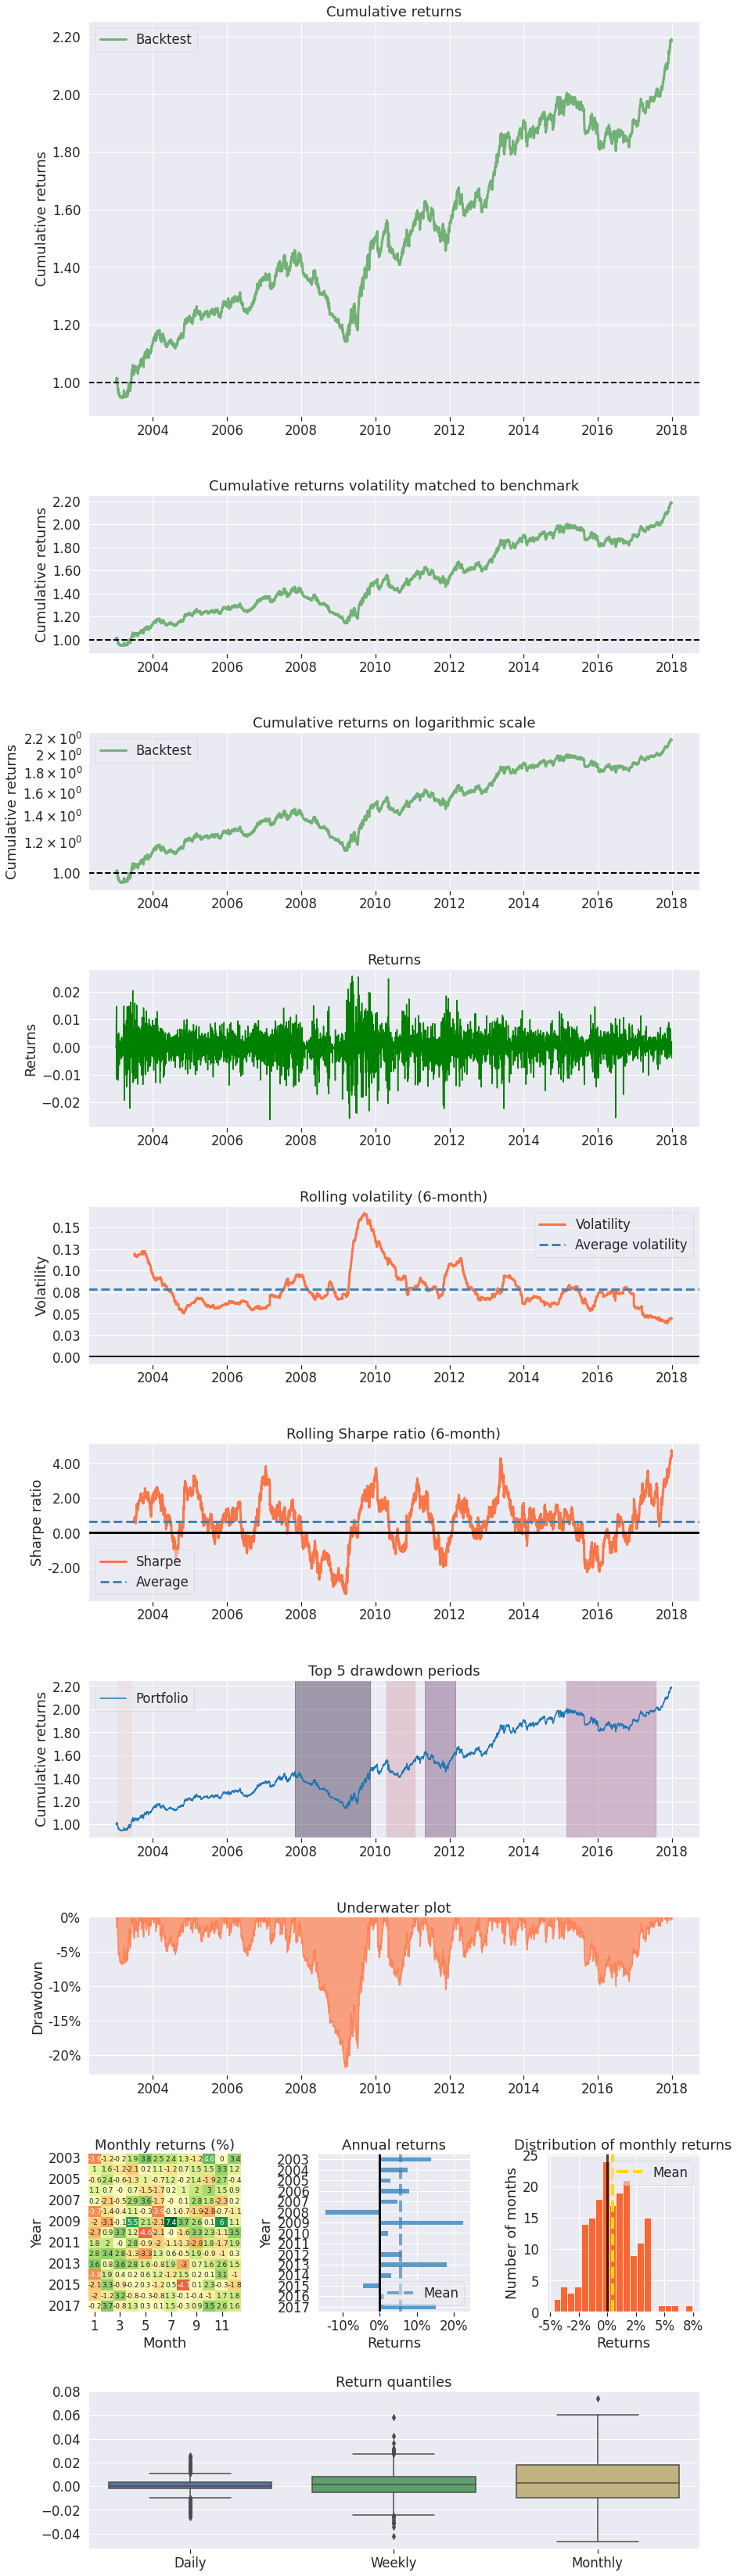

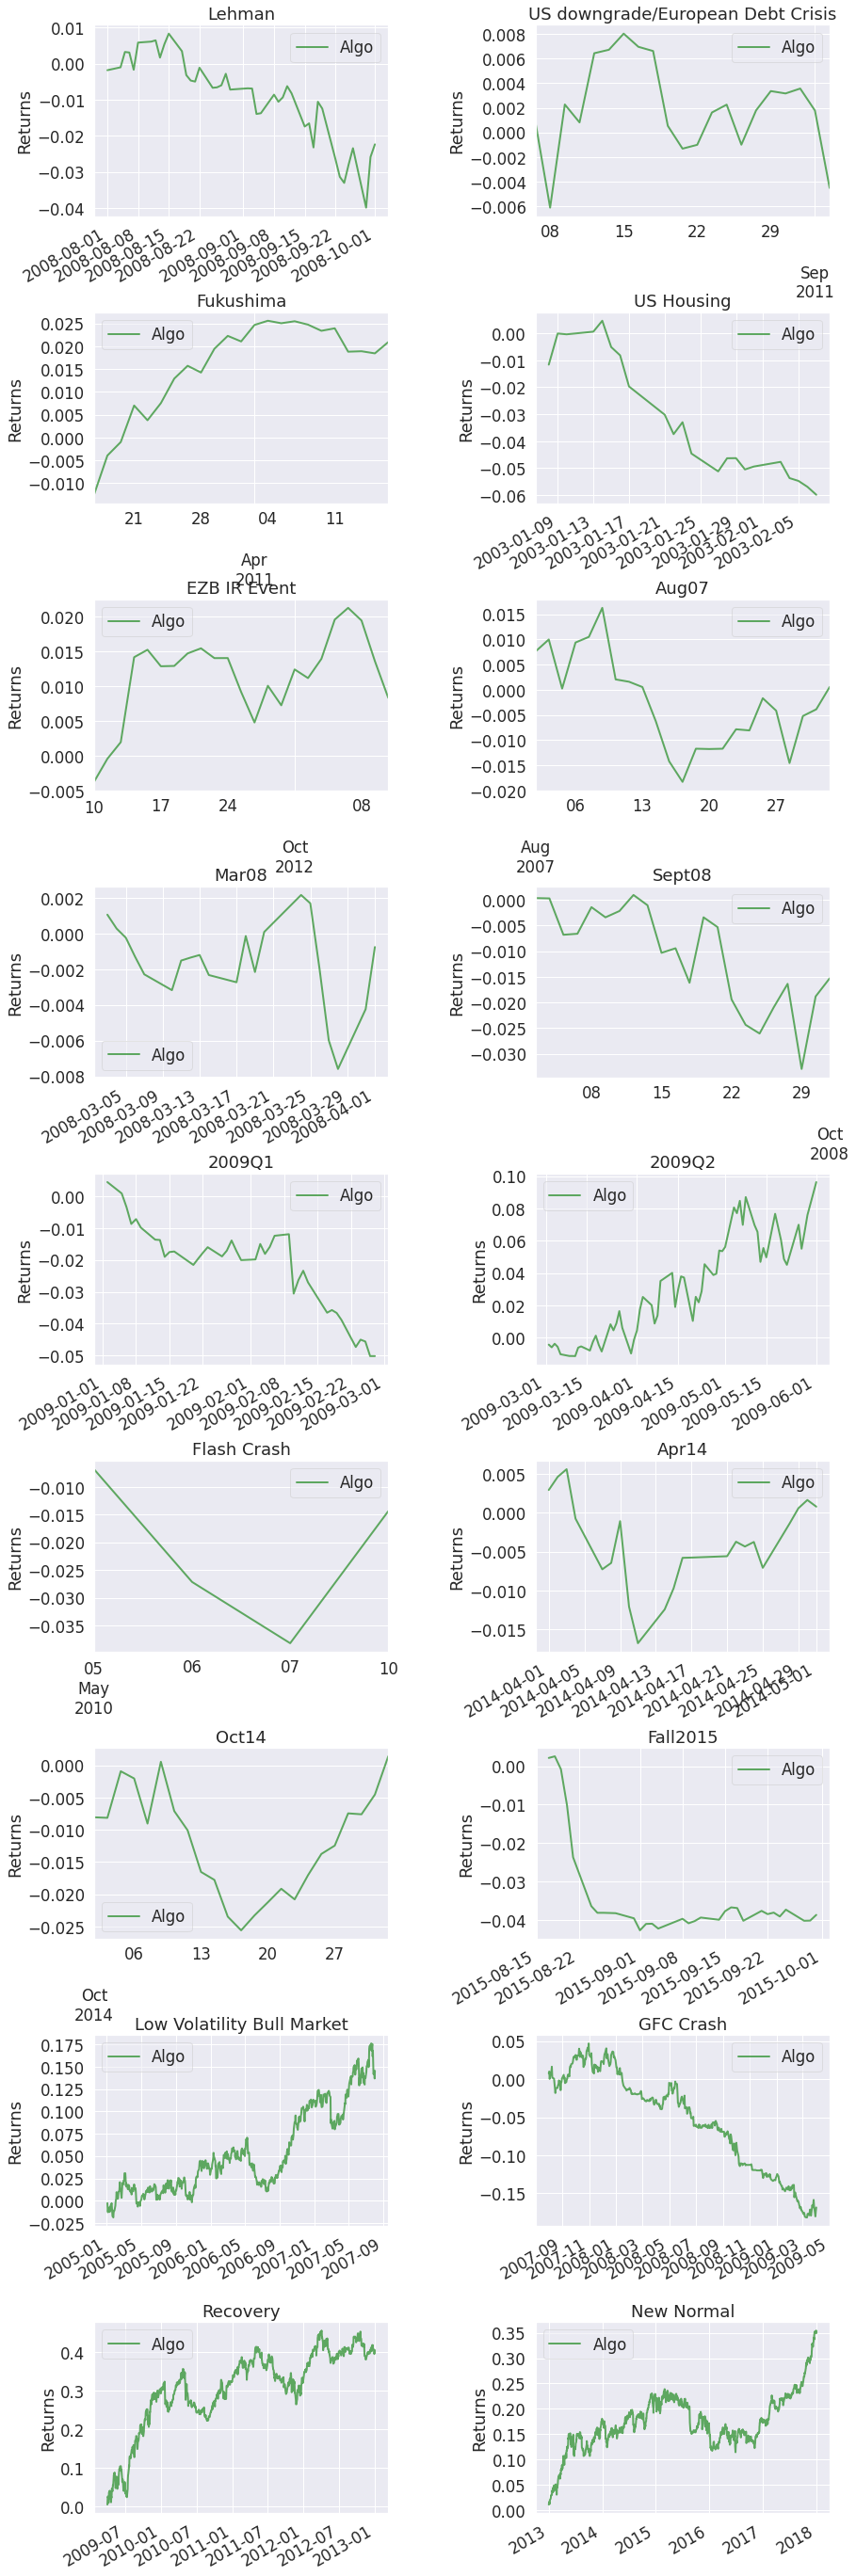

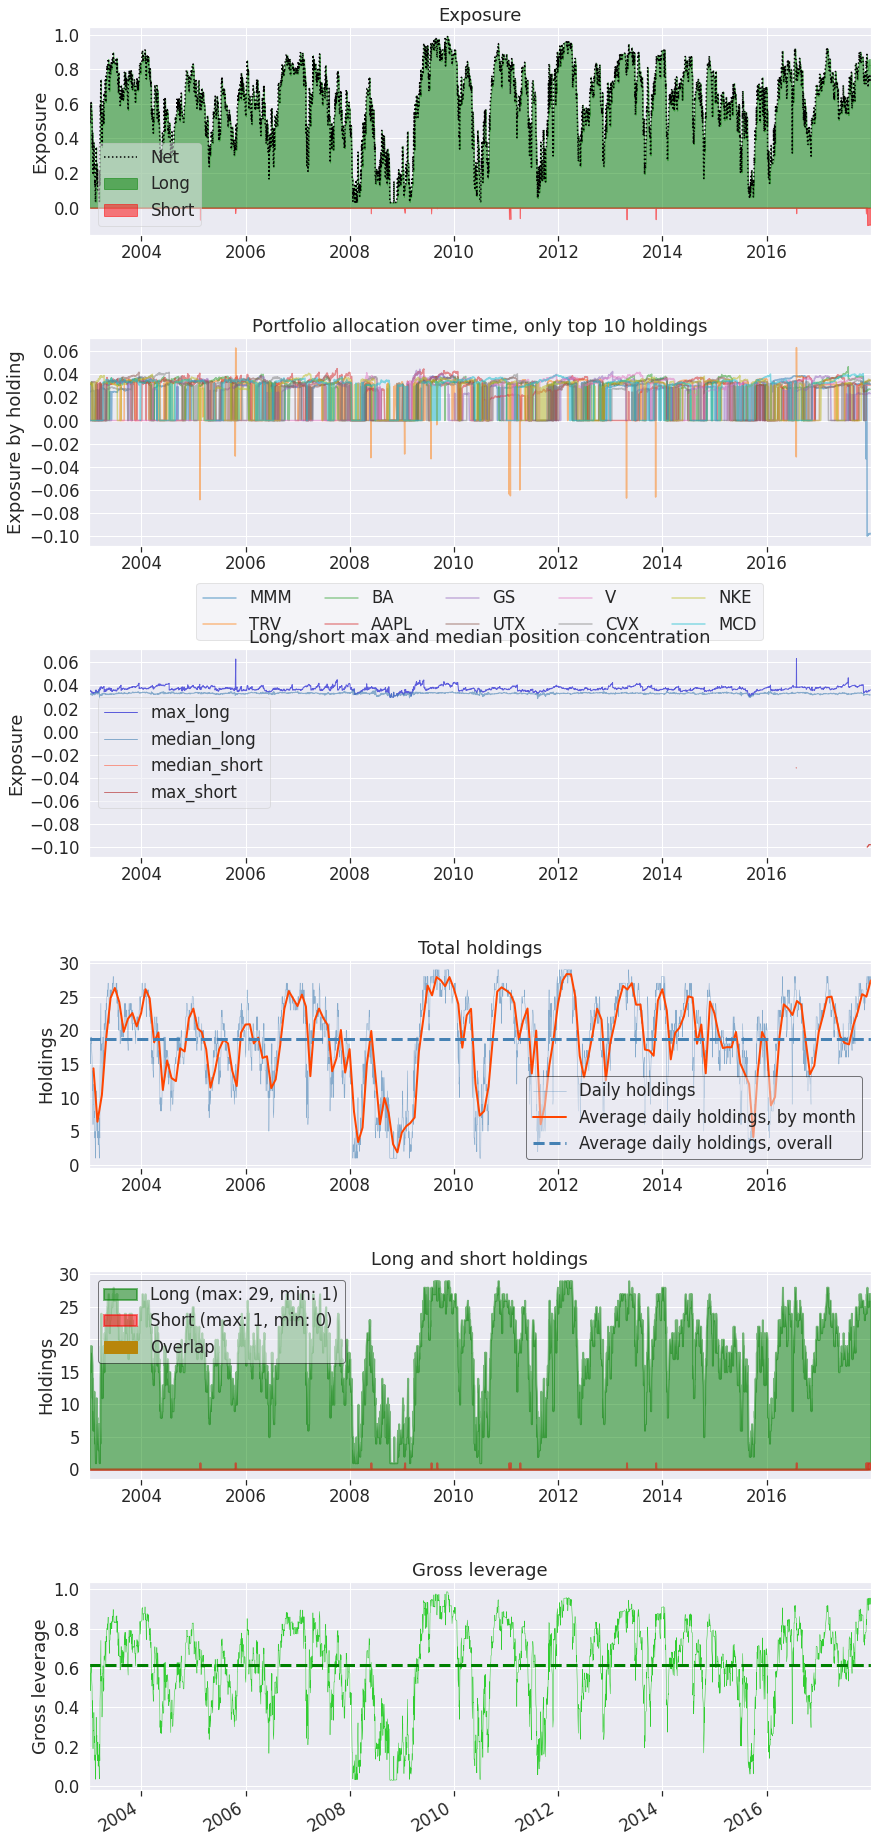

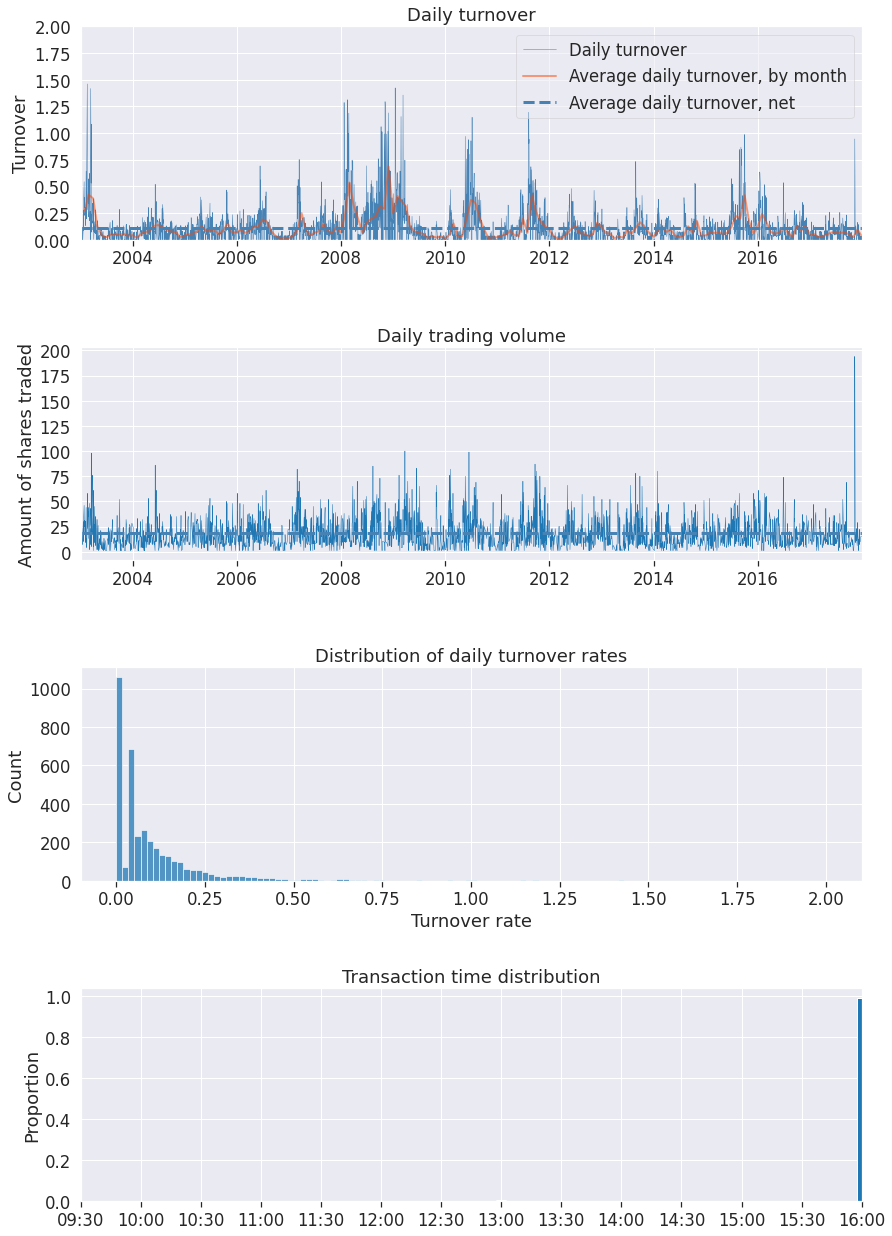

In [13]:
# This ensures that our graphs will be shown properly in the notebook.
%matplotlib inline

# Import a few libraries we need
from zipline import run_algorithm
from zipline.api import order_target_percent, record, symbol, set_benchmark
import pyfolio as pf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def initialize(context):

  # Which stock to trade
  dji = ["AAPL","AXP",
         "BA","CAT",
         "CSCO","CVX",
         "DIS","DWDP",
         "GS","HD",
         "IBM","INTC",
         "JNJ","JPM",
         "KO","MCD",
         "MMM","MRK",
         "MSFT","NKE",
         "PFE","PG",
         "TRV","UNH",
         "UTX","V",
         "VZ","WBA",
         "WMT","XOM"]

  # Make a list of symbols from the list of tickers
  context.dji_symbols = [symbol(s) for s in dji]

  # Moving average window
  context.index_average_window = 100
  
def handle_data(context, data):
  
  # Get history for all the stocks
  stock_hist = data.history(context.dji_symbols, "close", context.index_average_window, "1d")

  # Make an empty DataFrame to start with
  stock_analytics = pd.DataFrame()

  # Add column for above or below average
  stock_analytics['above_mean'] = stock_hist.iloc[-1] > stock_hist.mean()

  # Set weight for stocks to buy
  stock_analytics.loc[stock_analytics['above_mean'] == True, 'weight'] = 1/len(context.dji_symbols)

  # Set weight to zero for the rest
  stock_analytics.loc[stock_analytics['above_mean'] == False, 'weight'] = 0.0

  # Iterate each row and place trades
  for stock, analytics in stock_analytics.iterrows():

    # Check if the stock can be traded
    if data.can_trade(stock):

      # Place the trade
      order_target_percent(stock, analytics['weight'])

def analyze(context, perf):

  # Use PyFolio to generate a performance report
  returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)

  benchmark_period_return = perf['benchmark_period_return']

  daily_benchmark_returns = np.exp(np.log(benchmark_period_return + 1.0).diff()) - 1

  # Create tear sheet
  pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, benchmark_rets=None)

# Set start and end date
start_date = pd.Timestamp('2003-1-1', tz='utc')
end_date = pd.Timestamp('2017-12-31', tz='utc')

# Fire off the backtest
perf = run_algorithm(
start=start_date,
end=end_date,
initialize=initialize,
analyze=analyze,
handle_data=handle_data,
capital_base=10000,
data_frequency = 'daily', 
bundle= 'quandl',)

# **SAVE PERFORMANCE RESULTS**

In [14]:
perf.portfolio_value.to_csv('dow_model.csv')

# **COMPARING RESULTS TO BENCHMARK**

2001,-1.7,-0.7,+0.5,-1.7,-1.7,-1.5,+1.3,-2.8,+3.8,+2.7,-6.3,-1.7,-9.8
2002,-2.2,+3.7,-2.5,+2.6,+4.2,+4.5,+1.2,+7.6,+3.3,+2.2,-1.9,+10.9,+38.0
2003,+14.2,-2.9,-4.4,-2.1,+0.5,-0.9,-0.9,+7.0,+0.2,+5.1,+9.0,+2.7,+29.1
2004,+4.8,+12.3,-0.6,-12.8,-1.9,-1.7,+2.9,+2.5,+7.4,+3.2,-0.8,+1.4,+15.6
2005,-2.1,+6.3,+0.9,-4.9,-2.0,+0.1,-0.6,+8.6,+6.1,-1.4,+4.7,+1.4,+17.5
2006,+3.1,-2.1,-3.0,+3.8,-3.9,-5.3,+2.7,+0.3,-1.2,-0.5,+3.2,-2.4,-5.8
2007,-1.5,+2.5,+1.2,+3.9,-0.3,+2.9,+1.1,-5.4,+5.7,+14.5,-4.9,+5.7,+26.7
2008,+9.8,+18.7,-3.6,+4.4,+2.3,+4.6,-5.1,-9.4,-2.1,-1.6,+2.3,-0.2,+18.8
2009,+0.1,-1.7,+1.5,+0.1,+4.3,+0.2,+2.1,+3.0,+7.6,+8.6,+14.7,-4.2,+41.0
2010,-1.8,+7.4,-1.5,+2.4,-26.0,+1.5,+1.9,+2.5,+7.5,+12.1,-6.0,+15.2,+9.1
2011,+7.5,+9.5,+0.6,+7.9,-1.2,-4.7,+7.7,-4.8,-11.2,+1.0,+3.2,-0.8,+13.2


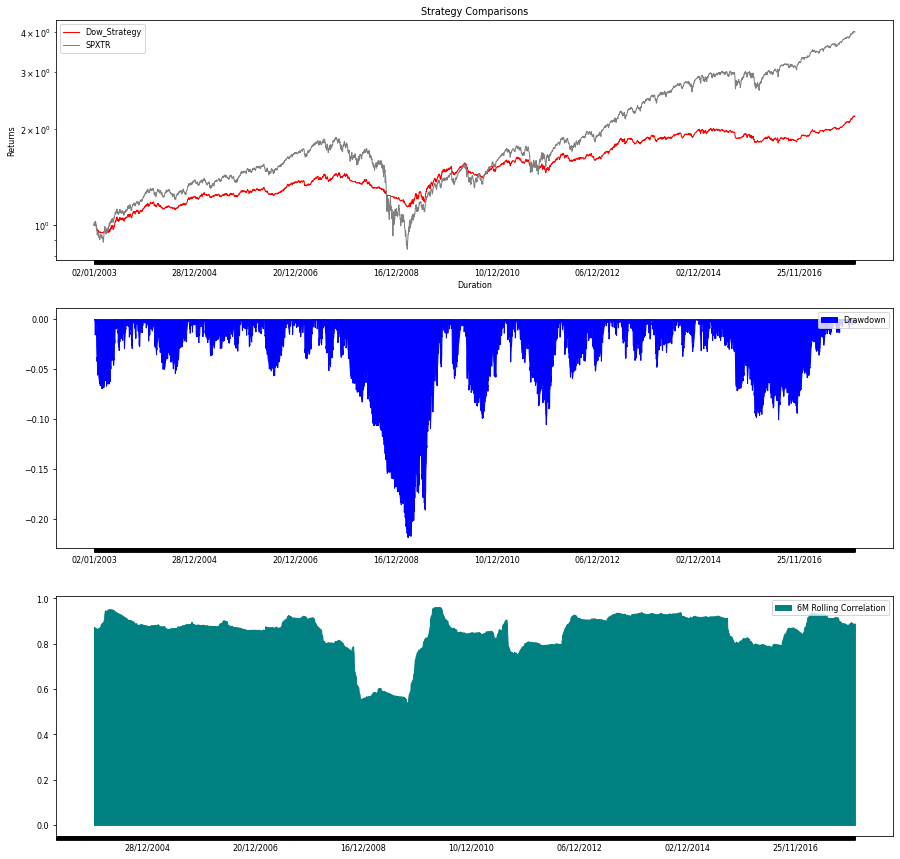

In [31]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import empyrical as em
from IPython.core.display import display, HTML
import pandas as pd
import numpy

base_path = '/content/drive/MyDrive/Colab Notebooks/My Project Folder/Backtests/'

benchmark_name = {"SPXTR" : "S&P 500 Total Return Index"}
bm = "SPXTR"
bm_name = benchmark_name[bm]

strat_names = {
    "core_trend" : "Core Trend Strategy",    
    "time_return" : "Time Return Strategy",
    "counter_trend" : "Counter Trend Strategy",
    "curve_trading" : "Curve Trading Strategy",
    "equity_momentum" : "Equity Momentum Strategy",
    "dow_model" : "Dow_Strategy",
}

strat = 'dow_model'
strat_name = strat_names[strat]

df = pd.read_csv(base_path + strat + '.csv', index_col=0, parse_dates=True, names=[strat] )
'''
df[bm_name] = pd.read_csv(base_path + bm + '.csv', index_col=0,parse_dates=True, names=[bm])
'''


df.index = df.index.strftime('%d/%m/%Y')


bm_name = pd.read_csv(base_path + bm + '.csv', index_col=0,parse_dates=True, names=[bm])
bm_name
bm_name.index = bm_name.index.strftime('%d/%m/%Y')

new_df = pd.concat([df, bm_name], axis=1, join='inner')

new_df['dow_model'] = new_df['dow_model'].astype(float)
new_df['SPXTR'] = new_df['SPXTR'].astype(float)

yr_periods = 252

# Format for book display
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 8}
matplotlib.rc('font', **font)

def equity_graph(new_df):
    new_df = new_df / new_df.iloc[0]

    # Calculate correlation
    new_df['Correlation'] = new_df[strat].pct_change().rolling(window=int(yr_periods / 1)).corr(new_df[bm].pct_change())    
    new_df['Drawdown'] = (new_df[strat] / new_df[strat].cummax()) - 1
    
    fig = plt.figure(figsize=(15,15))

    # First chart
    ax = fig.add_subplot(311)
    ax.set_title('Strategy Comparisons')
    ax.semilogy(new_df[strat], '-',label=strat_name, color='red', linewidth=1.0)
    ax.semilogy(new_df[bm], '-',label='SPXTR', color='grey', linewidth=1.0)
    spacing = 500
    visible = ax.xaxis.get_ticklabels()[::spacing]
    for label in ax.xaxis.get_ticklabels():
        if label not in visible:
            label.set_visible(False)
    ax.set_ylabel('Returns')
    ax.set_xlabel('Duration')
    plt.xticks(rotation=None)
    ax.legend()
    
    # Second chart
    ax = fig.add_subplot(312)
    ax.fill_between(new_df.index, new_df['Drawdown'], label='Drawdown', color='blue',linewidth=1.0)
    spacing = 500
    visible = ax.xaxis.get_ticklabels()[::spacing]
    for label in ax.xaxis.get_ticklabels():
        if label not in visible:
            label.set_visible(False)
    plt.xticks(rotation=None)
    ax.legend()

    # Third chart
    ax = fig.add_subplot(313)
    ax.fill_between(new_df.index, new_df['Correlation'], label='6M Rolling Correlation', color='teal', linewidth=1.0)
    spacing = 500
    visible = ax.xaxis.get_ticklabels()[::spacing]
    for label in ax.xaxis.get_ticklabels():
        if label not in visible:
            label.set_visible(False)
    plt.xticks(rotation=None)
    ax.legend()

equity_graph(new_df)

strat = 'counter_trend'
strat_name = strat_names[strat]

df = pd.read_csv(base_path + strat + '.csv', index_col=0, parse_dates=True, names=[strat] )

monthly_data = em.aggregate_returns(df[strat].pct_change(),'monthly')
yearly_data = em.aggregate_returns(df[strat].pct_change(),'yearly')

# Start off an HTML table for display 
table = """
<table id='monthlyTable' class='table table-hover table-condensed table-striped'>

<th style="text-align:top">Year</th>
<th style="text-align:top">Jan</th>
<th style="text-align:top">Feb</th>
<th style="text-align:top">Mar</th>
<th style="text-align:top">Apr</th>
<th style="text-align:top">May</th>
<th style="text-align:top">Jun</th>
<th style="text-align:top">Jul</th>
<th style="text-align:top">Aug</th>
<th style="text-align:top">Sep</th>
<th style="text-align:top">Oct</th>
<th style="text-align:top">Nov</th>
<th style="text-align:top">Dec</th>
<th style="text-align:top">Year</th>

<tr>"""

first_year = True
first_month = True
yr = 0
mnth = 0
for m, val in monthly_data.iteritems():
    yr = m[0]
    mnth = m[1]

    if(first_month):
        table += "<td align='right'><b>{}</b></td>\n".format(yr)
        first_month = False

    if(first_year): # pad empty months for first year if sim doesn't start in January
        first_year = False
        if(mnth > 1):
            for i in range(1, mnth):
                table += "<td align='right'>-</td>\n"

    table += "<td align='right'>{:+.1f}</td>\n".format(val * 100)

    if(mnth==12): # check for dec, add yearly
        table += "<td align='right'><b>{:+.1f}</b></td>\n".format(yearly_data[yr] * 100)     
        table += '</tr>\n <tr> \n'    
        first_month = True

# add padding for empty months and last year's value
if(mnth != 12):
    for i in range(mnth+1, 13):
        table += "<td align='right'>-</td>\n"
        if(i==12):
            table += "<td align='right'><b>{:+.1f}</b></td>\n".format(
                yearly_data[yr] * 100
            ) 
            table += '</tr>\n <tr> \n'
table += '</tr>\n </tbody> \n </table>'

display(HTML(table))

def holding_period_map(new_df):
    yr = em.aggregate_returns(new_df[strat].pct_change(), 'yearly')
    new_df = pd.DataFrame(columns=range(1,len(yr)+1), index=yr.index)

    yr_start = 0
    
    table = "<table class='table table-hover table-condensed table-striped'>"
    table += "<tr><th>Years</th>"
    
    for i in range(len(yr)):
        table += "<th>{}</th>".format(i+1)
    table += "</tr>"

    for the_year, value in yr.iteritems(): # Iterates years
        table += "<tr><th>{}</th>".format(the_year) # New table row
        
        for yrs_held in (range(1, len(yr)+1)): # Iterates yrs held 
            if yrs_held   <= len(yr[yr_start:yr_start + yrs_held]):
                ret = em.annual_return(yr[yr_start:yr_start + yrs_held], 'yearly' )
                table += "<td>{:+.0f}</td>".format(ret * 100)
        table += "</tr>"    
        yr_start+=1
    return table

table = holding_period_map(df)
display(HTML(table))


In [33]:
new_df

,dow_model,SPXTR
02/01/2003,10000.000000,1303.1732
03/01/2003,9997.337090,1302.5464
06/01/2003,10145.173515,1331.8198
07/01/2003,10106.230195,1323.1704
08/01/2003,9988.926120,1304.9525
...,...,...
22/12/2017,21859.681217,5229.7910
26/12/2017,21849.961217,5224.5078
27/12/2017,21868.351742,5229.0132
28/12/2017,21911.251742,5239.5884


In [22]:
new_df['dow_model'] = new_df['dow_model'].astype(float)
new_df['SPXTR'] = new_df['SPXTR'].astype(float)

# **Andreas Clenow Models**

## **Clenow Momentum Model**

In [8]:
#@title
%matplotlib inline

import zipline
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol, set_commission, set_slippage, schedule_function, date_rules, time_rules
from pandas import Timestamp
import pytz
from datetime import datetime
import matplotlib.pyplot as plt 
import pyfolio as pf
import pandas as pd 
import numpy as np 
from scipy import stats
from zipline.finance.commission import PerDollar
from zipline.finance.slippage import VolumeShareSlippage, FixedSlippage

#Model Settings

intial_portfolio = 100000
momentum_window = 125
minimum_momentum = 40
portfolio_size = 30
vola_window = 20

#Commission and Slippage Settings

enable_commission = True 
commission_pct = 0.001 
enable_slippage = True 
slippage_volume_limit = 0.025
slippage_impact = 0.05

def momentum_score(ts):

  #Input: Price time series.Output: Annualized exponential regression slope, multiplied by the R2

  # Make a list of consecutive numbers 
  x = np.arange(len(ts))
  # Get logs
  log_ts = np.log(ts)
  # Calculate regression values
  slope, intercept, r_value, p_value, std_err = stats.linregress(x, log_ts) 
  # Annualize percent
  annualized_slope = (np.power(np.exp(slope), 252) - 1) * 100 
  #Adjust for fitness
  score = annualized_slope * (r_value ** 2) 
  return score

def volatility(ts):
  return ts.pct_change().rolling(vola_window).std().iloc[-1]

def output_progress(context):

  #Output some performance numbers during backtest run 
  #This code just prints out the past month's performance,
  # so that we have something to look at while the backtest runs.

  # Get today's date
  today = zipline.api.get_datetime().date()

  # Calculate percent difference since last month
  perf_pct = (context.portfolio.portfolio_value / context.last_month) - 1

  # Print performance, format as percent with two decimals. 
  print("{} - Last Month Result: {:.2%}".format(today, perf_pct))

  # Remember today's portfolio value for next month's calculation 
  context.last_month = context.portfolio.portfolio_value

#Initialization and trading logic


def initialize(context):

  # Set commission and slippage.
  if enable_commission:
    comm_model = PerDollar(cost=commission_pct) 
  else:
    comm_model = PerDollar(cost=0.0) 
  set_commission(comm_model)
  if enable_slippage: slippage_model=VolumeShareSlippage(volume_limit=slippage_volume_limit,
price_impact=slippage_impact) 
  else:
    slippage_model=FixedSlippage(spread=0.0) 
  set_slippage(slippage_model)

  # Used only for progress output. 
  context.last_month = intial_portfolio

  # Store index membership
  context.index_members = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/My Project Folder/index members/sp500.csv', index_col=0, parse_dates=[0], engine='python', error_bad_lines=False)


  #Schedule rebalance monthly. 
  schedule_function(
    func=rebalance, 
    date_rule=date_rules.month_start(), 
    time_rule=time_rules.market_open()
  )

def rebalance(context, data):
  # Write some progress output during the backtest 
  output_progress(context)

  # First, get today's date
  today = zipline.api.get_datetime()

  # Second, get the index makeup for all days prior to today.
  all_prior = context.index_members.loc[context.index_members.index < today]

  # Now let's snag the first column of the last, i.e. latest, entry. 
  latest_day = all_prior.iloc[-1,0]

  # Split the text string with tickers into a list 
  list_of_tickers = latest_day.split(',')

  # Finally, get the Zipline symbols for the tickers 
  todays_universe = [symbol(ticker) for ticker in list_of_tickers]

  todays_universe = [ 
    symbol(ticker) for ticker in
    context.index_members.loc[context.index_members.index < today].iloc[-1,0].split(',')
  ]

  # Get historical data
  hist = data.history(todays_universe, "close", momentum_window, "1d")

  # Make momentum ranking table
  ranking_table = hist.apply(momentum_score).sort_values(ascending=False)

  #Sell Logic
  #First we check if any existing position should be sold.
    #Sell if stock is no longer part of index.
    #Sell if stock has too low momentum value.

  kept_positions = list(context.portfolio.positions.keys()) 
  for security in context.portfolio.positions:
    if (security not in todays_universe): 
      order_target_percent(security, 0.0) 
      kept_positions.remove(security)
    elif ranking_table[security] < minimum_momentum: 
      order_target_percent(security, 0.0) 
      kept_positions.remove(security)

  #Stock Selection Logic
  #Check how many stocks we are keeping from last month.
  #Fill from top of ranking list, until we reach the desired total number of portfolio holdings.

  replacement_stocks = portfolio_size - len(kept_positions) 
  buy_list = ranking_table.loc[
    ~ranking_table.index.isin(kept_positions)][:replacement_stocks]
  new_portfolio = pd.concat(
    (buy_list,
    ranking_table.loc[ranking_table.index.isin(kept_positions)])
  )
  buy_list = ranking_table.loc[
    ~ranking_table.index.isin(kept_positions)][:replacement_stocks]

  #Calculate inverse volatility for stocks, and make target position weights.

  vola_table = hist[new_portfolio.index].apply(volatility) 
  inv_vola_table = 1 / vola_table
  sum_inv_vola = np.sum(inv_vola_table) 
  vola_target_weights = inv_vola_table / sum_inv_vola
  for security, rank in new_portfolio.iteritems(): 
    weight = vola_target_weights[security]
    if security in kept_positions:
      order_target_percent(security, weight)
    else:
      if ranking_table[security] > minimum_momentum: 
        order_target_percent(security, weight)

def analyze(context, perf):
  perf['max'] = perf.portfolio_value.cummax() 
  perf['dd'] = (perf.portfolio_value / perf['max']) - 1 
  maxdd = perf['dd'].min()

  ann_ret = (np.power((perf.portfolio_value.iloc[-1] / perf.portfolio_value.iloc[0]),(252 / len(perf)))) - 1

  print("Annualized Return: {:.2%} Max Drawdown: {:.2%}".format(ann_ret, maxdd))

  return
'''
start= pd.Timestamp('1997-1-1', tz='utc')
end = pd.Timestamp('2018-12-31', tz='utc')
'''
start = pd.Timestamp(datetime(2000, 1, 1, tzinfo=pytz.UTC))
end = pd.Timestamp(datetime(2017, 12, 31, tzinfo=pytz.UTC))

perf = zipline.run_algorithm(start=start, end=end, 
                             initialize=initialize, 
                             analyze=analyze, 
                             capital_base=intial_portfolio, 
                             data_frequency = 'daily', 
                             bundle='my_custom_bundle' )

/usr/local/lib/python3.7/dist-packages/zipline/algorithm.py:427: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  self._initialize(self, *args, **kwargs)
Skipping line 1552: unexpected end of data


2000-01-03 - Last Month Result: 0.00%


TypeError: ignored

In [ ]:
!pip install pandas==1.3

## **Clenow Trend Model**

In [7]:

%matplotlib inline

import zipline
from zipline.api import future_symbol,  \
    set_commission, set_slippage, schedule_function, date_rules, \
    time_rules, continuous_future, order_target
from pandas import Timestamp
import pytz
import datetime as datetime
import matplotlib.pyplot as plt
import pyfolio as pf
import pandas as pd
import numpy as np  
from zipline.finance.commission import PerTrade, PerContract
from zipline.finance.slippage import VolumeShareSlippage, \
    FixedSlippage, VolatilityVolumeShare

# These lines are for the dynamic text reporting
from IPython.display import display
import ipywidgets as widgets
out = widgets.HTML()
display(out)

"""
Model Settings
"""
starting_portfolio = 50000000
risk_factor = 0.0015
stop_distance = 3
breakout_window = 50
vola_window = 40
slow_ma = 80
fast_ma = 40
enable_commission = True
enable_slippage = True  


def report_result(context, data):
    context.months += 1
    today = zipline.api.get_datetime().date()
    # Calculate annualized return so far
    ann_ret = np.power(context.portfolio.portfolio_value / starting_portfolio, 
                   12 / context.months) - 1
    
    # Update the text
    out.value = """{} We have traded <b>{}</b> months 
    and the annualized return is <b>{:.2%}</b>""".format(today, context.months, ann_ret)

def roll_futures(context, data):
    open_orders = zipline.api.get_open_orders()
    
    for held_contract in context.portfolio.positions:
        # don't roll positions that are set to change by core logic
        if held_contract in open_orders: 
            continue
        
        # Save some time by only checking rolls for
        # contracts stopping trading in the next days
        days_to_auto_close = (
            held_contract.auto_close_date.date() - data.current_session.date()
        ).days
        if days_to_auto_close > 5:
            continue        
        
        # Make a continuation
        continuation = continuous_future(
                held_contract.root_symbol, 
                offset=0, 
                roll='volume', 
                adjustment='mul'
                )
        
        # Get the current contract of the continuation
        continuation_contract = data.current(continuation, 'contract')
        
        if continuation_contract != held_contract:
            # Check how many contracts we hold
            pos_size = context.portfolio.positions[held_contract].amount         
            # Close current position
            order_target(held_contract, 0)
            # Open new position
            order_target(continuation_contract, pos_size)     
            
def position_size(portfolio_value, std, point_value):
    target_variation = portfolio_value * risk_factor
    contract_variation = std * point_value
    contracts = target_variation / contract_variation
    return int(np.nan_to_num(contracts)) 
    
def initialize(context):
    
    """
    Cost Settings
    """
    if enable_commission:
        comm_model = PerContract(cost=0.85, exchange_fee=1.5)
    else:
        comm_model = PerTrade(cost=0.0)
        
    set_commission(us_futures=comm_model)
    
    if enable_slippage:
        slippage_model=VolatilityVolumeShare(volume_limit=0.2)
    else:
        slippage_model=FixedSlippage(spread=0.0)      
        
    set_slippage(us_futures=slippage_model)
    
    """
    Markets to trade
    """ 
    currencies = [
        'AD',
        'BP',
        'CD',
        'CU',
        'DX',
        'JY',
        'NE',
        'SF',
    ]
    
    agricultural = [
        '_C',
        'CT',
        'FC',
        'KC',
        'LR',
        'LS',
        '_O',
        '_S',
        'SB',
        'SM',
        '_W',
    ]
    nonagricultural = [
        'CL',
        'GC',
        'HG',
        'HO',
        'LG',
        'NG',
        'PA',
        'PL',
        'RB',
        'SI',
    ]
    equities = [
        'ES',
        'NK',
        'NQ',
        'TW',
        'VX',
        'YM',
    ]
    rates = [
        'ED',
        'FV',
        'TU',
        'TY',
        'US',
    ]
    
    # Make a list of all the markets
    markets = currencies + agricultural + nonagricultural + equities + rates
    
    # Make a list of all continuations
    context.universe = [
        continuous_future(market, offset=0, roll='volume', adjustment='mul')
            for market in markets
    ]
    
    # We'll use these to keep track of best position reading
    # Used to calculate stop points.
    context.highest_in_position = {market: 0 for market in markets} 
    context.lowest_in_position = {market: 0 for market in markets}    
    
    # Schedule the daily trading
    schedule_function(daily_trade, date_rules.every_day(), time_rules.market_close())
    
    # We'll just use this for the progress output
    # during the backtest. Doesn't impact anything.
    context.months = 0    
    
    # Schedule monthly report output
    schedule_function(
        func=report_result,
        date_rule=date_rules.month_start(),
        time_rule=time_rules.market_open()
    ) 
    
def analyze(context, perf):
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
    pf.create_returns_tear_sheet(returns, benchmark_rets=None)
    
def daily_trade(context, data):
    # Get continuation data
    hist = data.history(
        context.universe, 
        fields=['close','volume'], 
        frequency='1d', 
        bar_count=250,
    )
    
    # Calculate trend
    hist['trend'] = hist['close'].ewm(span=fast_ma).mean() > hist['close'].ewm(span=slow_ma).mean()    
    
    # Make dictionary of open positions
    open_pos = {
        pos.root_symbol: pos 
        for pos in context.portfolio.positions
    } 
    
    # Iterate markets, check for trades
    for continuation in context.universe:
        
        # Get root symbol of continuation
        root = continuation.root_symbol
        
        # Slice off history for just this market
        h = hist.xs(continuation, 2)
        
        # Get standard deviation
        std = h.close.diff()[-vola_window:].std()

        if root in open_pos: # Position is open

            # Get position
            p = context.portfolio.positions[open_pos[root]]
            
            if p.amount > 0: # Position is long
                if context.highest_in_position[root] == 0: # First day holding the position
                    context.highest_in_position[root] = p.cost_basis
                else:
                    context.highest_in_position[root] = max(
                        h['close'].iloc[-1], context.highest_in_position[root]
                    ) 
                    
                # Calculate stop point
                stop = context.highest_in_position[root] - (std  * stop_distance)
                # Check if stop is hit
                if h.iloc[-1]['close'] < stop:
                    contract = open_pos[root]
                    order_target(contract, 0)
                    context.highest_in_position[root] = 0
                # Check if trend has flipped
                elif h['trend'].iloc[-1] == False:
                    contract = open_pos[root]
                    order_target(contract, 0)
                    context.highest_in_position[root] = 0
                    
            else: # Position is short
                if context.lowest_in_position[root] == 0: # First day holding the position
                    context.lowest_in_position[root] = p.cost_basis
                else:
                    context.lowest_in_position[root] = min(
                        h['close'].iloc[-1], context.lowest_in_position[root]
                    )
                
                # Calculate stop point
                stop = context.lowest_in_position[root] + (std  * stop_distance)
                
                # Check if stop is hit
                if h.iloc[-1]['close'] > stop:
                    contract = open_pos[root]
                    order_target(contract, 0)
                    context.lowest_in_position[root] = 0
                # Check if trend has flipped
                elif h['trend'].iloc[-1] == True:
                    contract = open_pos[root]
                    order_target(contract, 0)
                    context.lowest_in_position[root] = 0                         
        
        else: # No position on
            if h['trend'].iloc[-1]: # Bull trend
                # Check if we just made a new high
                if h['close'][-1] == h[-breakout_window:]['close'].max(): 
                    contract = data.current(continuation, 'contract')

                    contracts_to_trade = position_size( \
                                                       context.portfolio.portfolio_value, \
                                                       std, \
                                                       contract.price_multiplier)
                    
                    # Limit size to 20% of avg. daily volume
                    contracts_cap = int(h['volume'][-20:].mean() * 0.2)
                    contracts_to_trade = min(contracts_to_trade, contracts_cap)
                    
                    # Place the order
                    order_target(contract, contracts_to_trade)
             
            else: # Bear trend
                # Check if we just made a new low
                if h['close'][-1] == h[-breakout_window:]['close'].min(): 
                    contract = data.current(continuation, 'contract')

                    contracts_to_trade = position_size( \
                                                       context.portfolio.portfolio_value, \
                                                       std, \
                                                       contract.price_multiplier)
                    
                    # Limit size to 20% of avg. daily volume
                    contracts_cap = int(h['volume'][-20:].mean() * 0.2)
                    contracts_to_trade = min(contracts_to_trade, contracts_cap)
                    
                    # Place the order
                    order_target(contract, -1 * contracts_to_trade)
    
    # If we have open positions, check for rolls
    if len(open_pos) > 0:   
        roll_futures(context, data)                
                        

start = pd.Timestamp('2003-01-01', tz='utc')
end = pd.Timestamp('2017-12-31', tz='utc')

perf = zipline.run_algorithm(
    start=start, end=end, 
    initialize=initialize, 
    analyze=analyze,
    capital_base=starting_portfolio,  
    data_frequency = 'daily', 
    bundle='random_futures_data' ) 




HTML(value='')

LookupError: ignored

In [ ]:
import datetime
datetime.time()